In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("resources/final_adj.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Columns: 449 entries, Date to ZTS
dtypes: float64(448), object(1)
memory usage: 1.1+ MB


## lets check for missing Data-> Below we can see the data looks pretty good here

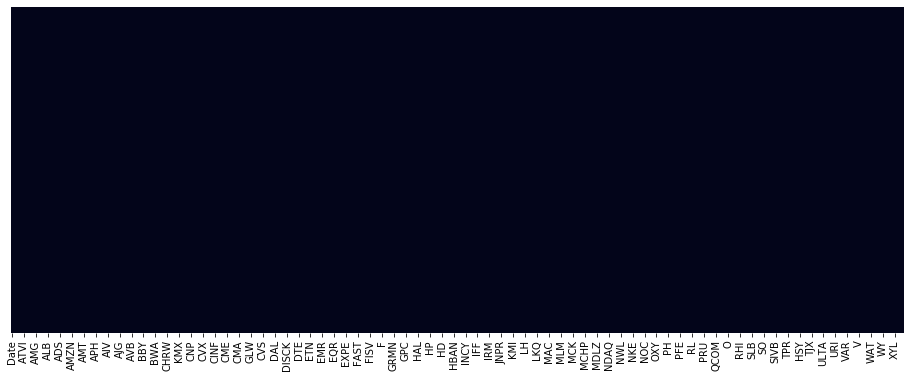

In [5]:
plt.figure(figsize=(16,6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

### Lets import the data on the companies we wull be working with in the S&P500

In [6]:
sanp = pd.read_csv("resources/final_sandp.csv")

In [7]:
sanp

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ACN,Accenture plc,Information Technology
...,...,...,...
473,XYL,Xylem Inc.,Industrials
474,YUM,Yum! Brands Inc,Consumer Discretionary
475,ZBH,Zimmer Biomet Holdings,Health Care
476,ZION,Zions Bancorp,Financials


### Corr of daily returns for each company in the S&P

In [8]:
data.set_index("Date", inplace=True)

In [9]:
daily_returns = pd.DataFrame()

In [10]:
for x in data.columns:
    daily_returns[x] = data[f"{x}"].pct_change()

### We now have the daily returns for each security so lets build our recommendation system on this data. We will assume the Apple is a very satisfying company currently and we want to find another company that moves the way Apple does. We will build our recomendation system based around this idea. 

In [11]:
similar_to_AAPL = daily_returns.corrwith(daily_returns["AAPL"]).sort_values(ascending = False)

In [12]:
corr_to_Apple = pd.DataFrame(similar_to_AAPL, columns=["Correlation"])

In [13]:
corr_to_Apple.head()

,Correlation
AAPL,1.000000
MSFT,0.828025
APH,0.798924
V,0.784310
AMP,0.781921


In [23]:
data

,MMM,AOS,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AMD,...,WHR,WMB,WYNN,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,183.068054,42.443329,68.076973,82.120384,138.303879,46.655220,114.642334,224.570007,157.235001,18.830000,...,103.390709,20.595535,100.250526,19.286905,85.283569,65.474289,89.536743,101.280602,40.154263,83.823868
2019-01-03,176.174835,41.418125,64.864136,79.414642,133.581940,44.998528,110.881607,215.699997,162.143646,17.049999,...,103.045822,20.770071,99.280663,18.865334,82.072556,63.229786,87.284607,99.448669,39.932148,80.926529
2019-01-04,183.422806,43.077972,66.715439,81.973129,138.776093,46.794102,116.074997,226.190002,158.121140,19.000000,...,108.085068,21.633577,103.284927,19.593504,85.872749,65.897575,89.556320,102.845154,41.158604,84.101685
2019-01-07,183.000946,43.849316,67.714539,83.169548,139.258118,48.113506,117.806122,229.259995,160.441040,20.570000,...,111.236992,22.184753,105.119019,20.015074,88.141090,64.922997,89.458405,102.884758,41.322777,84.607712
2019-01-08,183.767899,44.923336,66.901543,83.556091,142.779892,49.571793,119.925255,232.679993,159.325897,20.750000,...,113.737450,22.846161,108.412689,20.676178,86.461929,65.533348,89.282150,100.577530,41.699402,85.867859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-27,133.240005,36.849998,74.559998,72.669998,162.880005,56.959999,82.820000,305.829987,95.599998,46.580002,...,84.260002,13.910000,63.310001,17.660000,75.220001,65.500000,68.529999,94.940002,27.580000,111.769997
2020-03-30,137.740005,38.599998,79.339996,75.239998,169.820007,58.470001,85.760002,318.390015,96.500000,47.860001,...,87.709999,13.820000,61.099998,17.950001,79.349998,66.239998,70.669998,98.279999,27.520000,116.680000
2020-03-31,136.509995,37.810001,78.910004,76.190002,163.259995,59.480000,85.660004,318.239990,93.320000,45.480000,...,85.800003,14.150000,60.189999,18.940001,77.940002,65.129997,68.529999,101.080002,26.760000,117.690002


In [24]:
daily_returns

,MMM,AOS,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AMD,...,WHR,WMB,WYNN,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.037654,-0.024155,-0.047194,-0.032948,-0.034142,-0.035509,-0.032804,-0.039498,0.031219,-0.094530,...,-0.003336,0.008474,-0.009674,-0.021858,-0.037651,-0.034281,-0.025153,-0.018088,-0.005532,-0.034565
2019-01-04,0.041141,0.040075,0.028541,0.032217,0.038884,0.039903,0.046837,0.048632,-0.024808,0.114370,...,0.048903,0.041575,0.040333,0.038598,0.046303,0.042192,0.026027,0.034153,0.030713,0.039235
2019-01-07,-0.002300,0.017906,0.014976,0.014595,0.003473,0.028196,0.014914,0.013573,0.014672,0.082632,...,0.029162,0.025478,0.017758,0.021516,0.026415,-0.014789,-0.001093,0.000385,0.003989,0.006017
2019-01-08,0.004191,0.024493,-0.012006,0.004648,0.025290,0.030309,0.017988,0.014918,-0.006950,0.008751,...,0.022479,0.029814,0.031333,0.033030,-0.019051,0.009401,-0.001970,-0.022425,0.009114,0.014894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-27,-0.021589,-0.011534,-0.016489,-0.015712,-0.049375,-0.013167,-0.032929,-0.052190,-0.015651,-0.019368,...,0.012740,-0.023860,-0.114669,-0.090628,-0.063029,-0.036906,-0.095314,-0.058602,0.007673,-0.052074
2020-03-30,0.033774,0.047490,0.064109,0.035365,0.042608,0.026510,0.035499,0.041069,0.009414,0.027480,...,0.040945,-0.006470,-0.034908,0.016421,0.054906,0.011298,0.031227,0.035180,-0.002175,0.043930
2020-03-31,-0.008930,-0.020466,-0.005420,0.012626,-0.038629,0.017274,-0.001166,-0.000471,-0.032953,-0.049728,...,-0.021776,0.023878,-0.014894,0.055153,-0.017769,-0.016757,-0.030282,0.028490,-0.027616,0.008656


### lets add the tickers company names and sector to the frame 

In [14]:
ticker_and_compNAme = dict(list(zip(sanp["Symbol"], sanp["Name"])))

In [15]:
corr_to_Apple.reset_index(inplace=True)

In [16]:
corr_to_Apple["name"] = corr_to_Apple["index"].apply(lambda x : ticker_and_compNAme[x])

In [17]:
ticker_Sector = dict(list(zip(sanp["Symbol"], sanp["Sector"])))

In [18]:
corr_to_Apple["sector"] = corr_to_Apple["index"].apply(lambda x: ticker_Sector[x])

In [19]:
corr_to_Apple

,index,Correlation,name,sector
0,AAPL,1.000000,Apple Inc.,Information Technology
1,MSFT,0.828025,Microsoft Corp.,Information Technology
2,APH,0.798924,Amphenol Corp,Information Technology
3,V,0.784310,Visa Inc.,Information Technology
4,AMP,0.781921,Ameriprise Financial,Financials
...,...,...,...,...
443,CAG,0.237942,Conagra Brands,Consumer Staples
444,CLX,0.230066,The Clorox Company,Consumer Staples
445,PCG,0.137919,PG&E Corp.,Utilities
446,NEM,0.113134,Newmont Mining Corporation,Materials


### LEt take a look the top 20 companies correlatied to apple. For diversifications purposes we will selected companies that are not in the same sector. we will also make sure that there are no repetivie secors in the portfolio we will create

In [25]:
corr_to_Apple[corr_to_Apple["sector"] != "Information Technology"]

,index,Correlation,name,sector
4,AMP,0.781921,Ameriprise Financial,Financials
6,MS,0.770471,Morgan Stanley,Financials
9,C,0.766789,Citigroup Inc.,Financials
12,MET,0.762474,MetLife Inc.,Financials
13,PRU,0.759216,Prudential Financial,Financials
...,...,...,...,...
443,CAG,0.237942,Conagra Brands,Consumer Staples
444,CLX,0.230066,The Clorox Company,Consumer Staples
445,PCG,0.137919,PG&E Corp.,Utilities
446,NEM,0.113134,Newmont Mining Corporation,Materials
